In [ ]:
### Loading data and required libraries

In [2]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
df = pd.read_csv('houseprices.csv')

In [4]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

In [5]:
#Dropping features with most missing values
df.drop(['Id','PoolQC','MiscFeature','Fence','Alley'],axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\cmt\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\cmt\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Sale Price distribution')

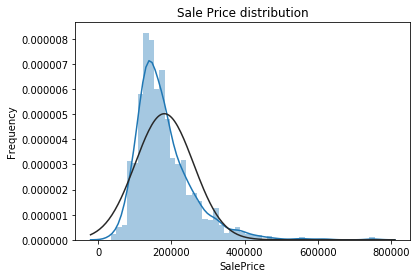

In [8]:
#  Distribution plot to check the values of Sale price
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df['SalePrice'] , fit=norm)
plt.ylabel('Frequency')
plt.title('Sale Price distribution')

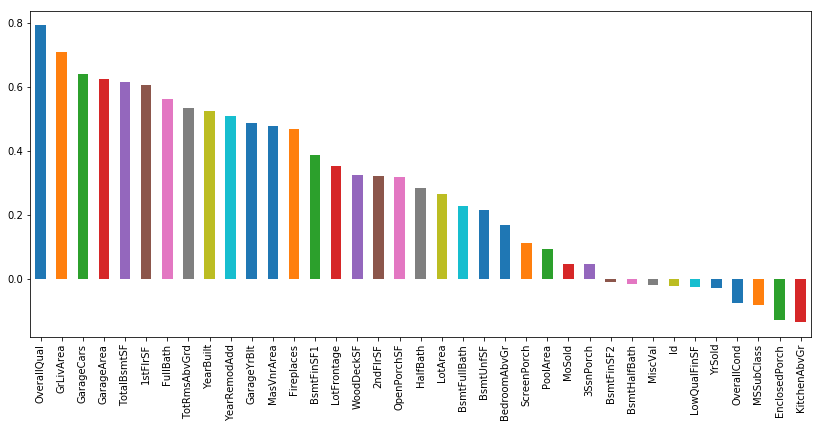

In [9]:
#Correlation plot
corr_with_sale_price = df.corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_sale_price.drop("SalePrice").plot.bar()
plt.show()

In [10]:
filtered_feats = df.dtypes[df.dtypes != "object"].index

normalized_feats = df[filtered_feats].apply(lambda x: skew(x.dropna())) 
normalized_feats = normalized_feats[normalized_feats > 0.75]
normalized_feats = normalized_feats.index

df[normalized_feats] = np.log1p(df[normalized_feats])

In [12]:
df[normalized_feats]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,4.110874,4.189655,9.042040,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,...,0.000000,0.693147,0.000000,4.127134,0.000000,0.000000,0.000000,0.0,0.000000,12.247699
1,3.044522,4.394449,9.169623,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,...,0.693147,0.693147,5.700444,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.109016
2,4.110874,4.234107,9.328212,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,...,0.000000,0.693147,0.000000,3.761200,0.000000,0.000000,0.000000,0.0,0.000000,12.317171
3,4.262680,4.110874,9.164401,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,...,0.000000,0.693147,0.000000,3.583519,5.609472,0.000000,0.000000,0.0,0.000000,11.849405
4,4.110874,4.442651,9.565284,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,...,0.000000,0.693147,5.262690,4.442651,0.000000,0.000000,0.000000,0.0,0.000000,12.429220
5,3.931826,4.454347,9.555064,0.000000,6.597146,0.000000,4.174387,6.680855,6.680855,6.340359,...,0.000000,0.693147,3.713572,3.433987,0.000000,5.771441,0.000000,0.0,6.552508,11.870607
6,3.044522,4.330733,9.218804,5.231109,7.222566,0.000000,5.762051,7.430707,7.435438,0.000000,...,0.000000,0.693147,5.545177,4.060443,0.000000,0.000000,0.000000,0.0,0.000000,12.634606
7,4.110874,4.207109,9.247925,5.484797,6.756932,3.496508,5.379897,7.010312,7.010312,6.891626,...,0.000000,0.693147,5.463832,5.323010,5.433722,0.000000,0.000000,0.0,5.860786,12.206078
8,3.931826,3.951244,8.719481,0.000000,0.000000,0.000000,6.859615,6.859615,6.930495,6.624065,...,0.000000,1.098612,4.510860,0.000000,5.327876,0.000000,0.000000,0.0,0.000000,11.774528
9,5.252273,3.931826,8.912069,0.000000,6.747587,0.000000,4.948760,6.899723,6.982863,0.000000,...,0.000000,1.098612,0.000000,1.609438,0.000000,0.000000,0.000000,0.0,0.000000,11.678448


In [13]:
# One hot encoding the categorical variables
df = pd.get_dummies(df)
df = df.fillna(df.mean())

In [14]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,...,0,0,0,1,0,0,0,0,1,0
5,6,3.931826,4.454347,9.555064,5,5,1993,1995,0.000000,6.597146,...,0,0,0,1,0,0,0,0,1,0
6,7,3.044522,4.330733,9.218804,8,5,2004,2005,5.231109,7.222566,...,0,0,0,1,0,0,0,0,1,0
7,8,4.110874,4.207109,9.247925,7,6,1973,1973,5.484797,6.756932,...,0,0,0,1,0,0,0,0,1,0
8,9,3.931826,3.951244,8.719481,7,5,1931,1950,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
9,10,5.252273,3.931826,8.912069,5,6,1939,1950,0.000000,6.747587,...,0,0,0,1,0,0,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split
X, y = df.drop(['SalePrice'], axis = 1), df['SalePrice']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn import tree
decisiontree = tree.DecisionTreeRegressor()
decisiontree = decisiontree.fit(X_train, y_train)

In [17]:
y_train_predict = decisiontree.predict(X_train)
y_predict = decisiontree.predict(X_test)

In [18]:
print('Train r2 score: ', r2_score(y_train_predict, y_train))
print('Test r2 score: ', r2_score(y_test, y_predict))
train_mse1 = mean_squared_error(y_train_predict, y_train)
test_mse1 = mean_squared_error(y_predict, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  0.9999999938754339
Test r2 score:  0.715725260510993
Train RMSE: 0.0000
Test RMSE: 0.2075


In [19]:
import xgboost as xgb
from xgboost import XGBRegressor 
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
y_train_predict = xgb_model.predict(X_train)
y_predict = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_predict, y_train))
print('Test r2 score: ', r2_score(y_test, y_predict))
train_mse1 = mean_squared_error(y_train_predict, y_train)
test_mse1 = mean_squared_error(y_predict, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  0.9546549676293461
Test r2 score:  0.8825855108629462
Train RMSE: 0.0819
Test RMSE: 0.1333
